## Table of Contents 
1. Movtivation 
2. Data Collection 
3. Data Cleaning 
4. Visualization 

## Motivation 

This is a showcase of my abilities of designing and convieving an end-to-end data visualization 

As in any project, first and foremost is using the right tools 

In [1]:
import pandas as pd 
import yfinance as yf 
import yahooquery as yq
import data_cleaning 
import matplotlib.pyplot as plt
import packed_bubbles
import matplotlib.colors
import numpy as np

### Data Collection

First I wanted to find any all stocks related to AI, I began by using sceeners from Yahoo! Finance, relating to Inforation Technology Services, Most Visited Technology and a Market Scan for Technology

In [2]:
techSceener = yq.Screener()
raw_data = techSceener.get_screeners(['information_technology_services', 'most_visited_technology', 'ms_technology'])

I then processed the raw data from the scanners to extract the tickers related to those scanners. 

In [3]:
tech_tickers = data_cleaning.find_tickers(raw_data)
tech_tickers[0:10]

['ZI', 'EXLS', 'FICO', 'BR', 'GLOB', 'TRMB', 'LRCX', 'SAIC', 'SWKS', 'INFY']

Next I used the tickers from the Scanners and gathered the business descriptions data.

In [4]:

Tickers = yf.Tickers(tech_tickers)

descriptionDF = data_cleaning.get_ticker_descrition(Tickers)

In [5]:
descriptionDF

,Symbol,Description
0,ZI,"ZoomInfo Technologies Inc., through its subsid..."
1,EXLS,"ExlService Holdings, Inc. operates as a data a..."
2,FICO,"Fair Isaac Corporation develops analytic, soft..."
3,BR,"Broadridge Financial Solutions, Inc. provides ..."
4,GLOB,Globant S.A. operates as a technology services...
...,...,...
62,NOW,"ServiceNow, Inc. provides enterprise cloud com..."
63,EPAM,"EPAM Systems, Inc. provides digital platform e..."
64,INTC,"Intel Corporation designs, develops, manufactu..."
65,IBM,"International Business Machines Corporation, t..."


In my initial investigation I used the following keywords to determine if a company is an AI company.

In [6]:
data_cleaning.ai_keywords

['artificial intellege', 'machine learning', '\\sml\\s|\\.', '\\sai\\s|\\.']

Once I identified the companies with AI keywords, I went back to the tickers to find their market maps 

In [7]:
descriptionDF["AI_Company"] = descriptionDF["Description"].map(data_cleaning.mentions_ai)

AI_Companies = descriptionDF.loc[descriptionDF["AI_Company" ] == True]


AI_Companies["Market_Cap"] = AI_Companies["Symbol"].apply(data_cleaning.get_market_cap, args=(Tickers,))

C:\Users\leona.odole\AppData\Local\Temp\ipykernel_20420\962466737.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AI_Companies["Market_Cap"] = AI_Companies["Symbol"].apply(data_cleaning.get_market_cap, args=(Tickers,))


After Capturing and Cleaning all of the data, I can finally start the visualization. 

In [8]:
# mc_millions = AI_Companies["Market_Cap"].map(lambda x: x / 1000000)
# bubbles = packed_bubbles.BubbleChart(area=AI_Companies.loc[:,"Market_Cap"],bubble_spacing=0.1 )
# bubbles.collapse() 

# fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
# cmap = plt.get_cmap("Pastel1")
# colors = cmap(np.linspace(0,1,len(AI_Companies.index)))
# sym = AI_Companies.loc[:,"Symbol"].values


# bubbles.plot(ax, sym, colors)

# ### Have the problem that its being rendered to largely 

[(0.0, 22.0), (0.0, 22.0)]

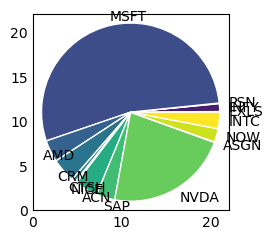

In [16]:
plt.style.use('_mpl-gallery-nogrid')
colors = plt.get_cmap('viridis')(np.linspace(0,1,len(AI_Companies["Market_Cap"])))
fig,ax = plt.subplots()
ax.pie(AI_Companies["Market_Cap"], colors=colors, radius = 10, center = (11,11), labels=AI_Companies["Symbol"],
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

ax.set(xlim=(0,22),ylim=(0,22) )

In [ ]:
### Playground to be deleted 


# txt = ' we are an Artificial intellegence company '
# txt2 = 'wewantml'
# txt3 = 'we want ml,'

# regexes =  ["artificial intellege","machine learning", "\sml\s|\.", "\sai\s|\." ]
# # Make a regex that matches if any of our regexes match.

# def replace_punct(s): 
#     punct = r"[!\"#\$%&\'\(\)\*\+,\./:;<=>\?@\[\\\]\^_`{\|}~]"
#     return re.sub(punct, " ", s)


# def mentions_ai(description, keyword_list = regexes): 
#     # remove punctuation
#     d = replace_punct(description)
    
#     # combine keywords 
#     combined = "(" + ")|(".join(keyword_list) + ")" 
    
#     # search for keywords 
#     if re.search(combined, d, re.IGNORECASE):
#         return True
#     else: 
#         return False 



# print(mentions_ai(txt))
# print(mentions_ai(txt2))
# print(mentions_ai(txt3))
